In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [3]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 29/anemia_dataset.csv')
df.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 104
Total de variables disponibles (columnas) = 14 
Columnas que cuentan con un valor nulo -
Number            0
Name              0
%Red Pixel        0
%Green pixel      0
%Blue pixel       0
Hb                0
Anaemic           0
Unnamed: 7      104
Unnamed: 8      104
Unnamed: 9      104
Unnamed: 10     104
Unnamed: 11     104
Unnamed: 12     104
Unnamed: 13     103
dtype: int64


In [5]:
df2 = df2.drop(columns=['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'])

In [6]:
df2.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No
4,5,monoara,43.2870,30.6972,26.0158,12.4,No


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Name          104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [8]:
aneamic_bin = {'Yes':1 ,'No': 0}
df2['Anaemic'] = df2['Anaemic'].map(aneamic_bin)

Text(0.5, 1.0, 'Anaemic')

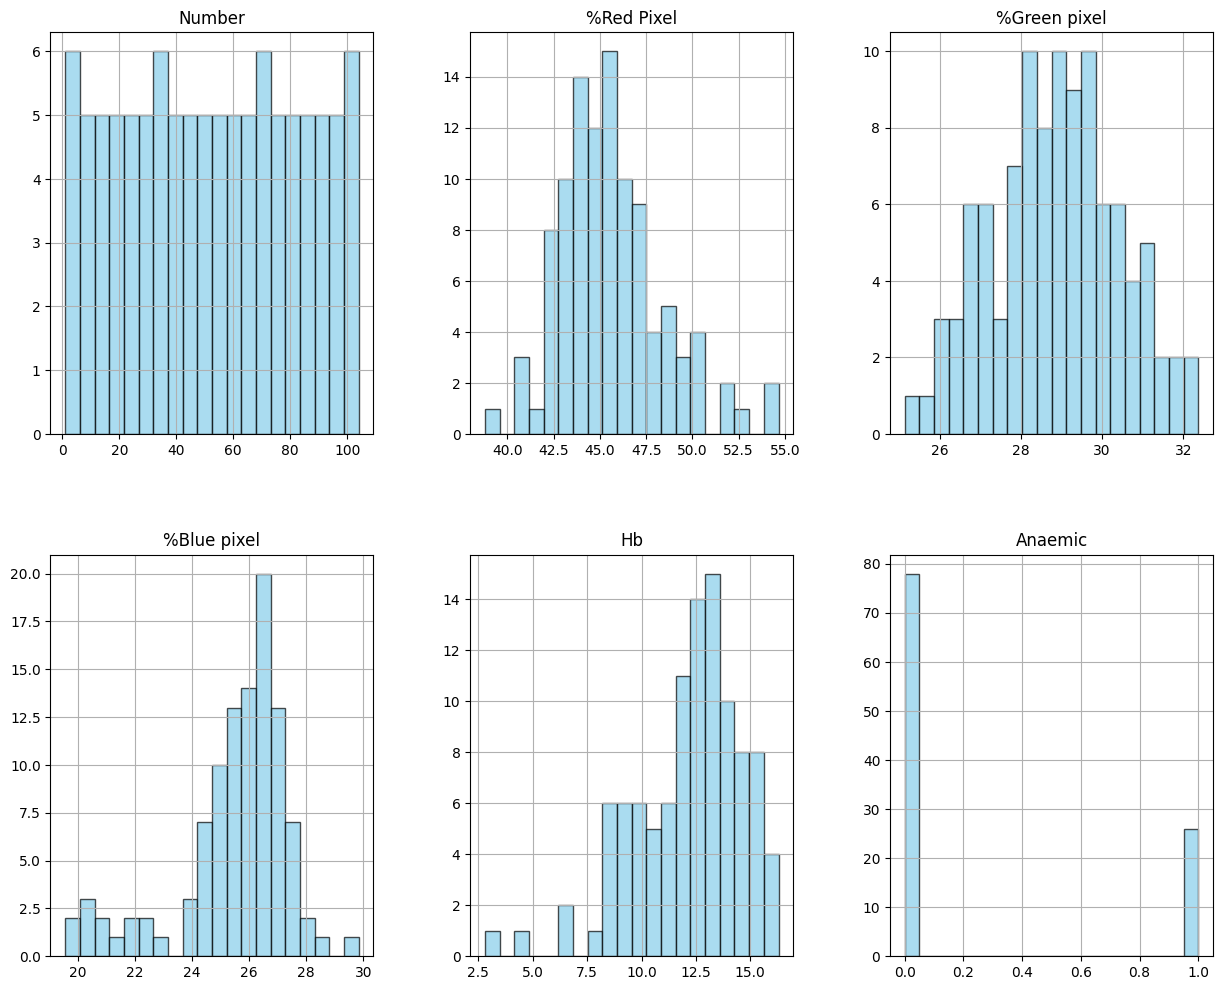

In [9]:
# Crear histogramas mejorados
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
df2.hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir títulos a cada subgráfico
axes[0, 0].set_title('Number')
axes[0, 1].set_title('%Red Pixel')
axes[0, 2].set_title('%Green pixel')
axes[1, 0].set_title('%Blue pixel')
axes[1, 1].set_title('Hb')
axes[1, 2].set_title('Anaemic')

In [10]:
# Definir características numéricas y categóricas

numeric_features = ['Number','%Red Pixel','%Green pixel','%Blue pixel','Hb',]

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

In [12]:
df2.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,-1.715476,Jafor Alam,-0.855838,1.271407,0.218811,-2.339593,1
1,-1.682166,khadiza,-0.018152,-0.443182,0.372828,0.539433,0
2,-1.648855,Lalu,-0.229589,0.059603,0.279061,-0.180324,0
3,-1.615545,Mira nath,-0.397605,0.073956,0.506289,0.539433,0
4,-1.582235,monoara,-0.844599,1.177729,0.276175,0.099582,0


# Redes neuronales

In [13]:
# Definir X e y
X = df2.drop(columns=['Name','Anaemic'])
y = df2['Anaemic']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
oculta = tf.keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=16, activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
salida = tf.keras.layers.Dense(units=1,activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,salida])

In [16]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [18]:
# Entrenar modelo
print('Entrenando Modelo')
historial = modelo.fit(X_train,y_train,epochs=10000,batch_size=16,verbose=False,validation_split=0.2,callbacks=[early_stopping])
print('Modelo entrenado')

Entrenando Modelo
Modelo entrenado


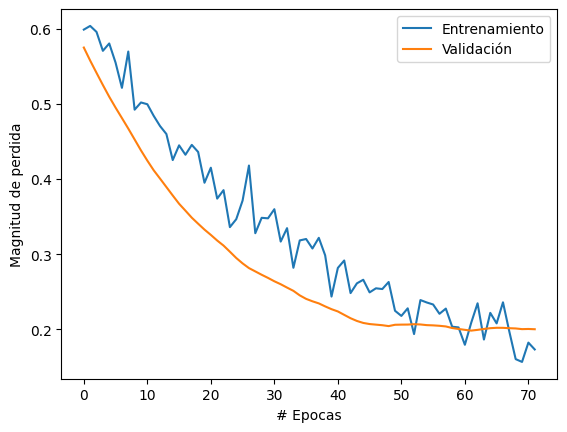

In [19]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento','Validación'])

In [20]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70, 10]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :5] = scaler.transform(nuevo_dato[:, :5])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

print(f'El resultado es: {resultado[0][0]}') 

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
El resultado es: 2.1437312921326567e-20


In [21]:
# Convertir la probabilidad a una predicción binaria
prediccion_binaria = (resultado > 0.5).astype(int)

# Imprimir el resultado y la predicción
print(f'El resultado es: {prediccion_binaria[0][0]}')
if prediccion_binaria[0][0] == 0:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 0, No tiene anemia')
else:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 1, Si tiene anemia')

El resultado es: 0
El resultado es: 0, predicción: 0, No tiene anemia


In [22]:
# Realizar predicciones usando el modelo entrenado
predicciones = modelo.predict(X)

predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

df2['Anaemic_pred'] = predicciones_binarias

# Verificar las primeras filas del DataFrame con las predicciones
print(df2.head())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
     Number        Name  %Red Pixel  %Green pixel  %Blue pixel        Hb  \
0 -1.715476  Jafor Alam   -0.855838      1.271407     0.218811 -2.339593   
1 -1.682166     khadiza   -0.018152     -0.443182     0.372828  0.539433   
2 -1.648855        Lalu   -0.229589      0.059603     0.279061 -0.180324   
3 -1.615545   Mira nath   -0.397605      0.073956     0.506289  0.539433   
4 -1.582235     monoara   -0.844599      1.177729     0.276175  0.099582   

   Anaemic  Anaemic_pred  
0        1             1  
1        0             0  
2        0             0  
3        0             0  
4        0             0  


In [23]:
# Comparar las predicciones con los valores reales
correct_prediction = (df2['Anaemic_pred'] == df2['Anaemic']).sum()

In [24]:
total_predicciones = len(df2)
precisión = (correct_prediction / total_predicciones) * 100
print(f'Precisión: {precisión:.2f}%')

margen_de_error = 100 - precisión
print(f'Margen de error: {margen_de_error:.2f}%')

Precisión: 96.15%
Margen de error: 3.85%


In [25]:
df2['Anaemic'].value_counts()

Anaemic
0    78
1    26
Name: count, dtype: int64

In [26]:
df2['Anaemic_pred'].value_counts()

Anaemic_pred
0    80
1    24
Name: count, dtype: int64

# Evaluación

```python
oculta = tf.keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=16, activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
salida = tf.keras.layers.Dense(units=1,activation='sigmoid')